## Notebook 4: Multivariate timeseries analysis

Again we work with 2NE1 dataset as prepared in notebook 1. As by nature our dataset is univariate, I need to first build the following dataset and extract features like mean, std, difference between the current value with 1, 2 and 3 previous days.

| Feature 1 | Feature 2 | Feature 3 | Feature 4 | Feature 5 | Feature 6 | Feature 7 | Feature 8 | target |
| :- | :- | :- | :- | :- | :- | :- | :- | :- |              
| var(t=-3) |  var(t=-2) |   var(t=-1) |  mean |  std |   var(t)-var(t=-3)  |  var(t)-var(t=-2) |   var(t)-var(t=-1) |      var(t) |

By "var" above I mean variable. To be more exact var(t=-3) is timeseries value at 3 points before var(t) which is current timeseries value.

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers.recurrent import LSTM
# from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [3]:
df = pd.read_csv('DF_2NE1.CSV')
df['date_idx'] = pd.to_datetime(df['date_idx'], infer_datetime_format=True)

In [4]:
df.head()

,2NE1_zh.wikipedia.org_all-access_spider,date_idx
0,18,2015-07-01
1,11,2015-07-02
2,5,2015-07-03
3,13,2015-07-04
4,14,2015-07-05


In [5]:
window_size = 3
data = []
target = []
for i in range(len(df) - window_size - 1):
    data.append(df[i:i + window_size]['2NE1_zh.wikipedia.org_all-access_spider'])
    target.append(df.loc[i+window_size]['2NE1_zh.wikipedia.org_all-access_spider'] ) 

In [6]:
data[:5]

[0    18
 1    11
 2     5
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 1    11
 2     5
 3    13
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 2     5
 3    13
 4    14
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 3    13
 4    14
 5     9
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
 4    14
 5     9
 6     9
 Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64]

In [7]:
np.array(data)

array([[18, 11,  5],
       [11,  5, 13],
       [ 5, 13, 14],
       ...,
       [26, 14, 20],
       [14, 20, 22],
       [20, 22, 19]], dtype=int64)

In [8]:
target[:5]

[13, 14, 9, 9, 22]

In [9]:
type(data)

list

In [10]:
len(data)

546

In [11]:
len(target)

546

In [12]:
[item for item in zip(data, target)]

[(0    18
  1    11
  2     5
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  13),
 (1    11
  2     5
  3    13
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  14),
 (2     5
  3    13
  4    14
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  9),
 (3    13
  4    14
  5     9
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  9),
 (4    14
  5     9
  6     9
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  22),
 (5     9
  6     9
  7    22
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  26),
 (6     9
  7    22
  8    26
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  24),
 (7    22
  8    26
  9    24
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  19),
 (8     26
  9     24
  10    19
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  10),
 (9     24
  10    19
  11    10
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  1

In [13]:
dict1 = {'features': data,
        'target': target}
# TypeError: unhashable type: 'list'

In [14]:
dict1

{'features': [0    18
  1    11
  2     5
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  1    11
  2     5
  3    13
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  2     5
  3    13
  4    14
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  3    13
  4    14
  5     9
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  4    14
  5     9
  6     9
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  5     9
  6     9
  7    22
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  6     9
  7    22
  8    26
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  7    22
  8    26
  9    24
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  8     26
  9     24
  10    19
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  9     24
  10    19
  11    10
  Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: int64,
  10    19
  11    10
  12    14
  Name: 2NE1_zh.wik

In [15]:
pd.DataFrame(dict1)

,features,target
0,0 18 1 11 2 5 Name: 2NE1_zh.wikipedi...,13
1,1 11 2 5 3 13 Name: 2NE1_zh.wikipedi...,14
2,2 5 3 13 4 14 Name: 2NE1_zh.wikipedi...,9
3,3 13 4 14 5 9 Name: 2NE1_zh.wikipedi...,9
4,4 14 5 9 6 9 Name: 2NE1_zh.wikipedi...,22
...,...,...
541,541 63 542 15 543 26 Name: 2NE1_zh.wi...,14
542,542 15 543 26 544 14 Name: 2NE1_zh.wi...,20
543,543 26 544 14 545 20 Name: 2NE1_zh.wi...,22
544,544 14 545 20 546 22 Name: 2NE1_zh.wi...,19


In [16]:
def create_dataset(dataset, col_name = '2NE1_zh.wikipedia.org_all-access_spider', window_size = 3):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size): 
        a = dataset[i:(i + window_size)][col_name]
        data_X.append(a)
        data_Y.append(dataset.loc[i + window_size][col_name])
    return(np.array(data_X), np.array(data_Y))

In [17]:
features, target_val = create_dataset(df)

In [18]:
features

array([[18, 11,  5],
       [11,  5, 13],
       [ 5, 13, 14],
       ...,
       [14, 20, 22],
       [20, 22, 19],
       [22, 19, 18]], dtype=int64)

In [19]:
tuple_list = list(zip(features, target_val))

In [20]:
len(tuple_list)

547

In [21]:
tuple_list[0]

(array([18, 11,  5], dtype=int64), 13)

In [22]:
tuple_list[0][0][0]

18

In [23]:
tuple_list[:]

[(array([18, 11,  5], dtype=int64), 13),
 (array([11,  5, 13], dtype=int64), 14),
 (array([ 5, 13, 14], dtype=int64), 9),
 (array([13, 14,  9], dtype=int64), 9),
 (array([14,  9,  9], dtype=int64), 22),
 (array([ 9,  9, 22], dtype=int64), 26),
 (array([ 9, 22, 26], dtype=int64), 24),
 (array([22, 26, 24], dtype=int64), 19),
 (array([26, 24, 19], dtype=int64), 10),
 (array([24, 19, 10], dtype=int64), 14),
 (array([19, 10, 14], dtype=int64), 15),
 (array([10, 14, 15], dtype=int64), 8),
 (array([14, 15,  8], dtype=int64), 16),
 (array([15,  8, 16], dtype=int64), 8),
 (array([ 8, 16,  8], dtype=int64), 8),
 (array([16,  8,  8], dtype=int64), 16),
 (array([ 8,  8, 16], dtype=int64), 7),
 (array([ 8, 16,  7], dtype=int64), 11),
 (array([16,  7, 11], dtype=int64), 10),
 (array([ 7, 11, 10], dtype=int64), 20),
 (array([11, 10, 20], dtype=int64), 18),
 (array([10, 20, 18], dtype=int64), 15),
 (array([20, 18, 15], dtype=int64), 14),
 (array([18, 15, 14], dtype=int64), 49),
 (array([15, 14, 49], 

In [24]:
pd.DataFrame(tuple_list, columns=['features1', 'target'])

,features1,target
0,"[18, 11, 5]",13
1,"[11, 5, 13]",14
2,"[5, 13, 14]",9
3,"[13, 14, 9]",9
4,"[14, 9, 9]",22
...,...,...
542,"[15, 26, 14]",20
543,"[26, 14, 20]",22
544,"[14, 20, 22]",19
545,"[20, 22, 19]",18


In [25]:
feature_1 = []
feature_2 = []
feature_3 = []
for i in range(len(tuple_list)):
    feature_1.append(tuple_list[i][0][0])
    feature_2.append(tuple_list[i][0][1])
    feature_3.append(tuple_list[i][0][2])
#     for j in range(3):
#         tuple_list[i][0][j]

In [26]:
feature_3

[5,
 13,
 14,
 9,
 9,
 22,
 26,
 24,
 19,
 10,
 14,
 15,
 8,
 16,
 8,
 8,
 16,
 7,
 11,
 10,
 20,
 18,
 15,
 14,
 49,
 10,
 16,
 18,
 8,
 5,
 9,
 7,
 13,
 9,
 7,
 4,
 11,
 10,
 5,
 9,
 9,
 9,
 9,
 13,
 4,
 15,
 25,
 9,
 5,
 6,
 20,
 3,
 14,
 46,
 5,
 5,
 13,
 4,
 9,
 10,
 9,
 11,
 11,
 11,
 9,
 15,
 5,
 10,
 7,
 4,
 8,
 9,
 10,
 6,
 13,
 16,
 6,
 24,
 9,
 11,
 12,
 8,
 14,
 6,
 6,
 11,
 14,
 6,
 10,
 20,
 7,
 15,
 8,
 15,
 5,
 8,
 8,
 5,
 11,
 165,
 34,
 6,
 13,
 8,
 9,
 11,
 26,
 18,
 3,
 5,
 12,
 6,
 16,
 19,
 9,
 10,
 11,
 11,
 7,
 9,
 10,
 24,
 6,
 6,
 8,
 16,
 13,
 10,
 10,
 6,
 5,
 20,
 6,
 47,
 9,
 9,
 12,
 11,
 17,
 15,
 14,
 11,
 97,
 11,
 12,
 11,
 14,
 15,
 12,
 104,
 5,
 22,
 45,
 75,
 29,
 34,
 20,
 12,
 25,
 9,
 62,
 20,
 19,
 8,
 23,
 13,
 16,
 34,
 36,
 11,
 18,
 12,
 24,
 30,
 27,
 44,
 35,
 53,
 11,
 26,
 13,
 18,
 9,
 16,
 6,
 19,
 20,
 19,
 22,
 30,
 14,
 16,
 22,
 15,
 15,
 26,
 16,
 13,
 27,
 18,
 13,
 32,
 31,
 16,
 38,
 18,
 9,
 14,
 10,
 24,
 8,
 15,
 18,
 10,


In [27]:
list_tmp = list(zip(feature_1, feature_2, feature_3, target_val))

In [28]:
list_tmp[:5]

[(18, 11, 5, 13),
 (11, 5, 13, 14),
 (5, 13, 14, 9),
 (13, 14, 9, 9),
 (14, 9, 9, 22)]

In [29]:
df_base = pd.DataFrame(list_tmp, columns=['var_lag3', 'var_lag2', 'var_lag1', 'current_val'])

In [30]:
df_base.head()

,var_lag3,var_lag2,var_lag1,current_val
0,18,11,5,13
1,11,5,13,14
2,5,13,14,9
3,13,14,9,9
4,14,9,9,22


In [31]:
df['date_idx'][3:]

3     2015-07-04
4     2015-07-05
5     2015-07-06
6     2015-07-07
7     2015-07-08
         ...    
545   2016-12-27
546   2016-12-28
547   2016-12-29
548   2016-12-30
549   2016-12-31
Name: date_idx, Length: 547, dtype: datetime64[ns]

In [32]:
df_base.tail()

,var_lag3,var_lag2,var_lag1,current_val
542,15,26,14,20
543,26,14,20,22
544,14,20,22,19
545,20,22,19,18
546,22,19,18,20


In [33]:
date_series = df['date_idx'][3:]
pd.concat([df_base, date_series], axis=1)

,var_lag3,var_lag2,var_lag1,current_val,date_idx
0,18.0,11.0,5.0,13.0,NaT
1,11.0,5.0,13.0,14.0,NaT
2,5.0,13.0,14.0,9.0,NaT
3,13.0,14.0,9.0,9.0,2015-07-04
4,14.0,9.0,9.0,22.0,2015-07-05
...,...,...,...,...,...
545,20.0,22.0,19.0,18.0,2016-12-27
546,22.0,19.0,18.0,20.0,2016-12-28
547,NaN,NaN,NaN,NaN,2016-12-29
548,NaN,NaN,NaN,NaN,2016-12-30


#### As seen above date_idx is not appended as we wanted. 2015-07-04 must be at index 0.

In [34]:
len(df_base)

547

In [35]:
len(df['date_idx'][3:])

547

In [36]:
df['date_idx'][3:]

3     2015-07-04
4     2015-07-05
5     2015-07-06
6     2015-07-07
7     2015-07-08
         ...    
545   2016-12-27
546   2016-12-28
547   2016-12-29
548   2016-12-30
549   2016-12-31
Name: date_idx, Length: 547, dtype: datetime64[ns]

### As you see the date is not concatinated properly even with "ignore_index=True". This issue is explain [here](https://stackoverflow.com/questions/32801806/pandas-concat-ignore-index-doesnt-work). By reseting indices of both dataframes, this can be resolved as follows:

In [37]:
date_series.reset_index(drop=True, inplace=True)

In [38]:
df_base.reset_index(drop=True, inplace=True)

In [39]:
df_base_features = pd.concat([df_base, date_series], axis=1)
df_base_features

,var_lag3,var_lag2,var_lag1,current_val,date_idx
0,18,11,5,13,2015-07-04
1,11,5,13,14,2015-07-05
2,5,13,14,9,2015-07-06
3,13,14,9,9,2015-07-07
4,14,9,9,22,2015-07-08
...,...,...,...,...,...
542,15,26,14,20,2016-12-27
543,26,14,20,22,2016-12-28
544,14,20,22,19,2016-12-29
545,20,22,19,18,2016-12-30


In [40]:
columns_to_keep = ['var_lag1', 'var_lag2', 'var_lag3']
df_base_features[columns_to_keep].mean(axis=1)

0      11.333333
1       9.666667
2      10.666667
3      12.000000
4      10.666667
         ...    
542    18.333333
543    20.000000
544    18.666667
545    20.333333
546    19.666667
Length: 547, dtype: float64

In [41]:
columns_to_keep = ['var_lag1', 'var_lag2', 'var_lag3']
df_base_features['mean'] = df_base_features[columns_to_keep].mean(axis=1).apply(lambda x: round(x, 2))

In [42]:
df_base_features.head()

,var_lag3,var_lag2,var_lag1,current_val,date_idx,mean
0,18,11,5,13,2015-07-04,11.33
1,11,5,13,14,2015-07-05,9.67
2,5,13,14,9,2015-07-06,10.67
3,13,14,9,9,2015-07-07,12.00
4,14,9,9,22,2015-07-08,10.67


In [43]:
columns_to_keep = ['var_lag1', 'var_lag2', 'var_lag3']
df_base_features['std'] = df_base_features[columns_to_keep].std(axis=1).apply(lambda x: round(x, 2))

In [44]:
df_base_features['diff1'] = df_base_features['current_val'] - df_base_features['var_lag1']
df_base_features['diff2'] = df_base_features['current_val'] - df_base_features['var_lag2']
df_base_features['diff3'] = df_base_features['current_val'] - df_base_features['var_lag3']

In [45]:
df_base_features

,var_lag3,var_lag2,var_lag1,current_val,date_idx,mean,std,diff1,diff2,diff3
0,18,11,5,13,2015-07-04,11.33,6.51,8,2,-5
1,11,5,13,14,2015-07-05,9.67,4.16,1,9,3
2,5,13,14,9,2015-07-06,10.67,4.93,-5,-4,4
3,13,14,9,9,2015-07-07,12.00,2.65,0,-5,-4
4,14,9,9,22,2015-07-08,10.67,2.89,13,13,8
...,...,...,...,...,...,...,...,...,...,...
542,15,26,14,20,2016-12-27,18.33,6.66,6,-6,5
543,26,14,20,22,2016-12-28,20.00,6.00,2,8,-4
544,14,20,22,19,2016-12-29,18.67,4.16,-3,-1,5
545,20,22,19,18,2016-12-30,20.33,1.53,-1,-4,-2


### Applying XGBoost to above dataframe

Now that we have created features and prepared our dataframe, we use different models to predict values. As the number of data is only 547 records, lightgbm and catboost are probably not suitable.

In [46]:
# ! conda install -c anaconda py-xgboost

# Specifications: - py-xgboost -> python[version='>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.5,<3.6.0a0']

In [47]:
from xgboost import XGBRegressor

In [48]:
df_base_features.dtypes

var_lag3                int64
var_lag2                int64
var_lag1                int64
current_val             int64
date_idx       datetime64[ns]
mean                  float64
std                   float64
diff1                   int64
diff2                   int64
diff3                   int64
dtype: object

In [49]:
df_base_features.isnull().any()

var_lag3       False
var_lag2       False
var_lag1       False
current_val    False
date_idx       False
mean           False
std            False
diff1          False
diff2          False
diff3          False
dtype: bool

In [50]:
X = df_base_features.drop('current_val', axis = 1)
X = X.drop('date_idx', axis = 1)
y = df_base_features['current_val']

In [51]:
X.isnull().any()

var_lag3    False
var_lag2    False
var_lag1    False
mean        False
std         False
diff1       False
diff2       False
diff3       False
dtype: bool

In [52]:
y.isnull().any()

False

In [53]:
seed = 2021
test_size = 0.1
train_len = round(len(df_base_features) * (1-test_size))
X_train = X[:train_len]
X_test = X[train_len:]
y_train = y[:train_len]
y_test = y[train_len:]
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state = seed)
# # preparing validation set
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5)

# # fit model on training data
xgb_model = XGBRegressor(random_state=seed, n_estimators=2000, max_depth=4, colsample_bytree=0.85, missing=None,
                         scale_pos_weight=0.1, learning_rate=0.008, reg_alpha=2.01, reg_lambda=0.05, verbosity=1)
xgb_model.fit(X_train, y_train, verbose=150 )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.85, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.008, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=2000, n_jobs=8, num_parallel_tree=1,
             random_state=2021, reg_alpha=2.01, reg_lambda=0.05,
             scale_pos_weight=0.1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=1)

In [54]:
predictions_xgb = xgb_model.predict(X_test)
predictions_xgb

array([ 63.37521 ,  12.908805,  50.88125 ,  11.950102,  19.544756,
        13.738129,   8.444078,  15.292019,  14.045978,  12.74824 ,
         5.706309,  11.991892,  10.426684,  43.940742,  22.775871,
        23.685684,  14.610772,  10.765169, 253.27005 ,  13.651187,
        54.065205,  25.695747,  25.73571 ,  15.390067,  13.693675,
        47.669296,  14.189787,  13.761846,  18.205252,  19.316801,
        12.83852 ,  15.052923,  14.481504,  20.554176,  59.55235 ,
        20.370491,  14.518354,  15.712749,  18.503553,  17.410868,
        21.03111 ,  18.800829,  52.73854 ,  58.75331 ,  14.27705 ,
        27.686716,  57.4965  ,  14.114   ,  23.331219,  14.216544,
        20.799997,  21.33165 ,  18.886366,  17.40021 ,  19.257027],
      dtype=float32)

In [57]:
xgb_model.score(X_test, y_test)

0.9350600529668849

In [58]:
xgb_model.score(X_train, y_train)

0.9997910522430393

In [60]:
# from sklearn.metrics import accuracy_score

In [61]:
# accuracy_score(y_test, predictions_xgb)

# accuracy_score is for classification problem and not regressor. If you try it, not only it is wrong, but also
# you will get the following error:
# ValueError: Classification metrics can't handle a mix of multiclass and continuous targets


In [62]:
xgb_model.feature_importances_

array([0.01269336, 0.01669864, 0.13238259, 0.0202602 , 0.00843673,
       0.12595655, 0.5119872 , 0.17158477], dtype=float32)

In [66]:
imp = pd.DataFrame({'importance': xgb_model.feature_importances_*100, 'feature': X.columns})

In [67]:
imp

,importance,feature
0,1.269336,var_lag3
1,1.669864,var_lag2
2,13.238258,var_lag1
3,2.026020,mean
4,0.843673,std
5,12.595655,diff1
6,51.198723,diff2
7,17.158478,diff3


In [68]:
def train_xgb(test_size, seed = 2021):
    seed = seed
    test_size = test_size
    train_len = round(len(df_base_features) * (1-test_size))
    X_train = X[:train_len]
    X_test = X[train_len:]
    y_train = y[:train_len]
    y_test = y[train_len:]
    # X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state = seed)
    # # preparing validation set
    # X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5)

    # # fit model on training data
    xgb = XGBRegressor(random_state=seed, n_estimators=2000, max_depth=4, colsample_bytree=0.85, missing=None,
                             scale_pos_weight=0.1, learning_rate=0.008, reg_alpha=2.01, reg_lambda=0.05, verbosity=1)
    xgb.fit(X_train, y_train, verbose=150 )
    return xgb

In [89]:
xgb_1 = train_xgb(test_size=0.1)

In [84]:
xgb_2 = train_xgb(test_size=0.15)

In [85]:
xgb_3 = train_xgb(test_size=0.2)

In [86]:
xgb_4 = train_xgb(test_size=0.25)

In [87]:
xgb_5 = train_xgb(test_size=0.3)

In [95]:
xgb_model_list = []
xgb_model_list.append(xgb_1)
xgb_model_list.append(xgb_2)
xgb_model_list.append(xgb_3)
xgb_model_list.append(xgb_4)
xgb_model_list.append(xgb_5)

In [156]:
# models = []
# models.append(xgb_1)
# models.append(xgb_2)
# models.append(xgb_3)
# models.append(xgb_4)
# models.append(xgb_5)

In [90]:
xgb_1.score(X_test, y_test)

0.9350600529668849

In [91]:
xgb_1.score(X_train, y_train)

0.9997910522430393

In [92]:
xgb_2.score(X_test, y_test)

0.9344761731132468

In [93]:
xgb_2.score(X_train, y_train)

0.999746762941462

In [96]:
importance = []
for model in xgb_model_list:
    imp = pd.DataFrame({'importance': model.feature_importances_*100, 'feature': X.columns})
    importance.append(imp)

In [97]:
importance

[   importance   feature
 0    1.269336  var_lag3
 1    1.669864  var_lag2
 2   13.238258  var_lag1
 3    2.026020      mean
 4    0.843673       std
 5   12.595655     diff1
 6   51.198723     diff2
 7   17.158478     diff3,
    importance   feature
 0    1.295685  var_lag3
 1    1.804179  var_lag2
 2   12.535397  var_lag1
 3    1.913498      mean
 4    0.802537       std
 5   13.024042     diff1
 6   52.178478     diff2
 7   16.446186     diff3,
    importance   feature
 0    1.248971  var_lag3
 1    1.587720  var_lag2
 2   13.039702  var_lag1
 3    1.862373      mean
 4    0.819530       std
 5   13.115053     diff1
 6   52.550484     diff2
 7   15.776171     diff3,
    importance   feature
 0    1.382007  var_lag3
 1    1.596977  var_lag2
 2   13.140847  var_lag1
 3    1.963362      mean
 4    0.770369       std
 5   10.746139     diff1
 6   54.650085     diff2
 7   15.750216     diff3,
    importance   feature
 0    1.108533  var_lag3
 1    1.454450  var_lag2
 2   12.913348  var_l

In [99]:
type(importance[0])

pandas.core.frame.DataFrame

In [104]:
imp_df = pd.merge(importance[0], importance[1], left_on='feature', 
                  right_on='feature')[['feature', 'importance_x', 'importance_y']]
for i in range(2, len(importance)):
    imp_df = pd.merge(imp_df, importance[i], left_on='feature', right_on='feature')

imp_df

,feature,importance_x,importance_y,importance_x,importance_y,importance
0,var_lag3,1.269336,1.295685,1.248971,1.382007,1.108533
1,var_lag2,1.669864,1.804179,1.587720,1.596977,1.454450
2,var_lag1,13.238258,12.535397,13.039702,13.140847,12.913348
3,mean,2.026020,1.913498,1.862373,1.963362,1.857154
4,std,0.843673,0.802537,0.819530,0.770369,0.733038
5,diff1,12.595655,13.024042,13.115053,10.746139,9.768962
6,diff2,51.198723,52.178478,52.550484,54.650085,57.427700
7,diff3,17.158478,16.446186,15.776171,15.750216,14.736814


In [105]:
imp_df['mean'] = imp_df.mean(axis=1)

In [106]:
imp_df

,feature,importance_x,importance_y,importance_x,importance_y,importance,mean
0,var_lag3,1.269336,1.295685,1.248971,1.382007,1.108533,1.260906
1,var_lag2,1.669864,1.804179,1.587720,1.596977,1.454450,1.622638
2,var_lag1,13.238258,12.535397,13.039702,13.140847,12.913348,12.973511
3,mean,2.026020,1.913498,1.862373,1.963362,1.857154,1.924482
4,std,0.843673,0.802537,0.819530,0.770369,0.733038,0.793829
5,diff1,12.595655,13.024042,13.115053,10.746139,9.768962,11.849970
6,diff2,51.198723,52.178478,52.550484,54.650085,57.427700,53.601093
7,diff3,17.158478,16.446186,15.776171,15.750216,14.736814,15.973574


In [107]:
import seaborn as sns

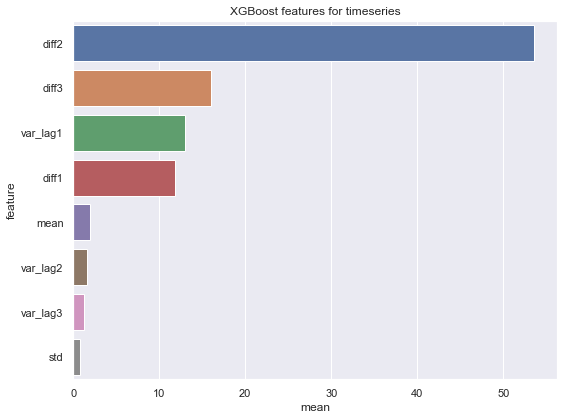

In [109]:
plt.figure(figsize=(8,6))
sns.set(context='notebook',style='darkgrid',palette='deep',font='sans-serif',font_scale=1)
sns.barplot(x='mean', y='feature', data=imp_df.sort_values(by='mean', ascending=False))
plt.title('XGBoost features for timeseries')
plt.tight_layout()
plt.show()

As you see above I have implemented crossfold validation without using sklearn train-test-split and kfold. The reason is in timeseries analysis we cannot use crossvalidation as train must always be before validation and test. But if we use sklearn kfold test and validation can appear before train data which is wrong considering nature of timeseries analysis.

### Lightgbm for timeseries analysis

Lightgbm requires a lot of data to be trained. We only have 550 records (train and test together). Therefore, lughtgbm is not a suitable algorithm in this case with this amount of data. We check it here.

In [110]:
import lightgbm

In [111]:
lgb = lightgbm.LGBMRegressor(random_state=2020, n_estimators=2000, num_leaves=20, learning_rate=0.011, colsample_bytree=0.85, max_depth=5,
                              verbose=-1, importance='gain')
lgb.fit(X_train, y_train, verbose=False)
pred = lgb.predict(X_test, num_iteration=lgb.best_iteration_)
# print(f1_score(y_test, pred, pos_label=0))

[LightGBM] [Warning] Unknown parameter: importance


In [112]:
lgb.score(X_test, y_test)

0.5265484540196874

In [113]:
lgb.score(X_train, y_train)

0.775950157163151

In [114]:
def train_lgb(test_size, seed = 2021):
    seed = seed
    test_size = test_size
    train_len = round(len(df_base_features) * (1-test_size))
    X_train = X[:train_len]
    X_test = X[train_len:]
    y_train = y[:train_len]
    y_test = y[train_len:]
    # X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state = seed)
    # # preparing validation set
    # X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5)

    # # fit model on training data
    lgb = lightgbm.LGBMRegressor(random_state=2020, n_estimators=2000, num_leaves=20, learning_rate=0.011, colsample_bytree=0.85, max_depth=5,
                              verbose=-1)
    lgb.fit(X_train, y_train, verbose=150 )
    return lgb

In [115]:
lgb_1 = train_lgb(test_size=0.1)

In [116]:
lgb_2 = train_lgb(test_size=0.15)

In [117]:
lgb_3 = train_lgb(test_size=0.2)

In [118]:
lgb_4 = train_lgb(test_size=0.25)

In [119]:
lgb_5 = train_lgb(test_size=0.3)

In [151]:
lgb_model_list = []
lgb_model_list.append(lgb_1)
lgb_model_list.append(lgb_2)
lgb_model_list.append(lgb_3)
lgb_model_list.append(lgb_4)
lgb_model_list.append(lgb_5)

In [157]:
# models.append(lgb_1)
# models.append(lgb_2)
# models.append(lgb_3)
# models.append(lgb_4)
# models.append(lgb_5)

In [122]:
lgb_5.score(X_test, y_test)

0.09745579311032204

In [121]:
lgb_5.score(X_train, y_train)

0.696006355464206

In [123]:
importance = []
for model in lgb_model_list:
    imp = pd.DataFrame({'importance': model.feature_importances_*100, 'feature': X.columns})
    importance.append(imp)

In [126]:
imp_df = pd.merge(importance[0], importance[1], left_on='feature', 
                  right_on='feature')[['feature', 'importance_x', 'importance_y']]
for i in range(2, len(importance)):
    imp_df = pd.merge(imp_df, importance[i], left_on='feature', right_on='feature')


In [127]:
imp_df['mean'] = imp_df.mean(axis=1)
imp_df

,feature,importance_x,importance_y,importance_x,importance_y,importance,mean
0,var_lag3,146200,158400,169600,136100,154500,152960.0
1,var_lag2,109100,114400,125400,119000,141400,121860.0
2,var_lag1,135200,142300,161300,156100,223500,163680.0
3,mean,234400,237700,238200,202000,164700,215400.0
4,std,125500,160400,160400,328500,231300,201220.0
5,diff1,273400,239900,232400,229700,201600,235400.0
6,diff2,285200,323200,306400,176500,205700,259400.0
7,diff3,188300,169400,172800,213400,230100,194800.0


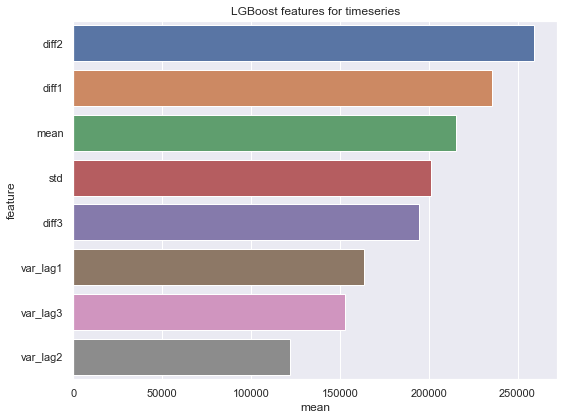

In [128]:
plt.figure(figsize=(8,6))
sns.set(context='notebook',style='darkgrid',palette='deep',font='sans-serif',font_scale=1)
sns.barplot(x='mean', y='feature', data=imp_df.sort_values(by='mean', ascending=False))
plt.title('LGBoost features for timeseries')
plt.tight_layout()
plt.show()

### Catboost

Using catboost to train a multivariate model for timeseries analysis.

In [129]:
import catboost

In [130]:
model = catboost.CatBoostRegressor(iterations=2000, learning_rate=0.1, depth=5)
model.fit(X_train, y_train, verbose=100)
pred = model.predict(X_test)


0:	learn: 28.8106088	total: 73.9ms	remaining: 2m 27s
100:	learn: 3.9636721	total: 141ms	remaining: 2.65s
200:	learn: 1.1739557	total: 217ms	remaining: 1.94s
300:	learn: 0.5745777	total: 283ms	remaining: 1.6s
400:	learn: 0.3840043	total: 355ms	remaining: 1.42s
500:	learn: 0.2826538	total: 419ms	remaining: 1.25s
600:	learn: 0.2116931	total: 486ms	remaining: 1.13s
700:	learn: 0.1629990	total: 553ms	remaining: 1.02s
800:	learn: 0.1286811	total: 620ms	remaining: 928ms
900:	learn: 0.1027011	total: 688ms	remaining: 840ms
1000:	learn: 0.0825148	total: 753ms	remaining: 751ms
1100:	learn: 0.0686040	total: 819ms	remaining: 668ms
1200:	learn: 0.0563173	total: 956ms	remaining: 636ms
1300:	learn: 0.0468302	total: 1.08s	remaining: 582ms
1400:	learn: 0.0393714	total: 1.23s	remaining: 527ms
1500:	learn: 0.0337704	total: 1.39s	remaining: 461ms
1600:	learn: 0.0283257	total: 1.48s	remaining: 368ms
1700:	learn: 0.0237422	total: 1.55s	remaining: 272ms
1800:	learn: 0.0204001	total: 1.62s	remaining: 179ms
190

In [131]:
model.score(X_test, y_test)

0.9946540461549559

In [132]:
model.score(X_train, y_train)

0.999999759892221

In [133]:
def train_cat(test_size, seed = 2021):
    seed = seed
    test_size = test_size
    train_len = round(len(df_base_features) * (1-test_size))
    X_train = X[:train_len]
    X_test = X[train_len:]
    y_train = y[:train_len]
    y_test = y[train_len:]
    # # fit model on training data
    cat = catboost.CatBoostRegressor(iterations=2000, learning_rate=0.1, depth=5)
    cat.fit(X_train, y_train, verbose=150 )
    return cat

In [134]:
cat_1 = train_cat(test_size=0.1)

0:	learn: 28.8106088	total: 606us	remaining: 1.21s
150:	learn: 2.0689769	total: 127ms	remaining: 1.56s
300:	learn: 0.5745777	total: 248ms	remaining: 1.4s
450:	learn: 0.3273717	total: 352ms	remaining: 1.21s
600:	learn: 0.2116931	total: 452ms	remaining: 1.05s
750:	learn: 0.1451779	total: 551ms	remaining: 916ms
900:	learn: 0.1027011	total: 654ms	remaining: 797ms
1050:	learn: 0.0748844	total: 754ms	remaining: 681ms
1200:	learn: 0.0563173	total: 866ms	remaining: 576ms
1350:	learn: 0.0431790	total: 1.03s	remaining: 495ms
1500:	learn: 0.0337704	total: 1.19s	remaining: 397ms
1650:	learn: 0.0261033	total: 1.31s	remaining: 277ms
1800:	learn: 0.0204001	total: 1.42s	remaining: 157ms
1950:	learn: 0.0157024	total: 1.52s	remaining: 38.2ms
1999:	learn: 0.0144611	total: 1.55s	remaining: 0us


In [135]:
cat_2 = train_cat(test_size=0.15)

0:	learn: 29.1341996	total: 1.02ms	remaining: 2.04s
150:	learn: 2.0116932	total: 126ms	remaining: 1.55s
300:	learn: 0.5840685	total: 238ms	remaining: 1.34s
450:	learn: 0.3240813	total: 343ms	remaining: 1.18s
600:	learn: 0.2095429	total: 442ms	remaining: 1.03s
750:	learn: 0.1476973	total: 542ms	remaining: 901ms
900:	learn: 0.1048739	total: 648ms	remaining: 790ms
1050:	learn: 0.0784576	total: 747ms	remaining: 675ms
1200:	learn: 0.0598336	total: 849ms	remaining: 565ms
1350:	learn: 0.0460689	total: 985ms	remaining: 473ms
1500:	learn: 0.0357978	total: 1.12s	remaining: 374ms
1650:	learn: 0.0278833	total: 1.22s	remaining: 258ms
1800:	learn: 0.0216745	total: 1.32s	remaining: 146ms
1950:	learn: 0.0168780	total: 1.42s	remaining: 35.7ms
1999:	learn: 0.0157336	total: 1.45s	remaining: 0us


In [136]:
cat_3 = train_cat(test_size=0.2)

0:	learn: 30.0673094	total: 1.22ms	remaining: 2.44s
150:	learn: 1.9753391	total: 115ms	remaining: 1.41s
300:	learn: 0.5547329	total: 238ms	remaining: 1.34s
450:	learn: 0.2983327	total: 341ms	remaining: 1.17s
600:	learn: 0.1921980	total: 440ms	remaining: 1.02s
750:	learn: 0.1302136	total: 535ms	remaining: 890ms
900:	learn: 0.0915795	total: 629ms	remaining: 767ms
1050:	learn: 0.0673240	total: 729ms	remaining: 658ms
1200:	learn: 0.0503710	total: 824ms	remaining: 549ms
1350:	learn: 0.0385350	total: 958ms	remaining: 460ms
1500:	learn: 0.0295210	total: 1.09s	remaining: 362ms
1650:	learn: 0.0218599	total: 1.2s	remaining: 254ms
1800:	learn: 0.0167561	total: 1.29s	remaining: 143ms
1950:	learn: 0.0126796	total: 1.46s	remaining: 36.8ms
1999:	learn: 0.0117811	total: 1.5s	remaining: 0us


In [137]:
cat_4 = train_cat(test_size=0.25)

0:	learn: 30.6418988	total: 1.32ms	remaining: 2.64s
150:	learn: 1.9627511	total: 130ms	remaining: 1.59s
300:	learn: 0.5183993	total: 235ms	remaining: 1.33s
450:	learn: 0.2890199	total: 344ms	remaining: 1.18s
600:	learn: 0.1820334	total: 441ms	remaining: 1.03s
750:	learn: 0.1230102	total: 538ms	remaining: 894ms
900:	learn: 0.0816490	total: 633ms	remaining: 772ms
1050:	learn: 0.0573718	total: 739ms	remaining: 667ms
1200:	learn: 0.0414512	total: 833ms	remaining: 554ms
1350:	learn: 0.0304725	total: 962ms	remaining: 462ms
1500:	learn: 0.0223972	total: 1.1s	remaining: 367ms
1650:	learn: 0.0166215	total: 1.2s	remaining: 255ms
1800:	learn: 0.0125371	total: 1.31s	remaining: 144ms
1950:	learn: 0.0093913	total: 1.4s	remaining: 35.2ms
1999:	learn: 0.0085694	total: 1.43s	remaining: 0us


In [138]:
cat_5 = train_cat(test_size=0.3)

0:	learn: 31.5606041	total: 995us	remaining: 1.99s
150:	learn: 2.0487805	total: 118ms	remaining: 1.45s
300:	learn: 0.5468816	total: 227ms	remaining: 1.28s
450:	learn: 0.2946960	total: 325ms	remaining: 1.11s
600:	learn: 0.1745610	total: 415ms	remaining: 967ms
750:	learn: 0.1122904	total: 507ms	remaining: 844ms
900:	learn: 0.0767994	total: 600ms	remaining: 732ms
1050:	learn: 0.0520216	total: 694ms	remaining: 627ms
1200:	learn: 0.0370928	total: 788ms	remaining: 524ms
1350:	learn: 0.0271242	total: 887ms	remaining: 426ms
1500:	learn: 0.0198537	total: 1.03s	remaining: 341ms
1650:	learn: 0.0146715	total: 1.18s	remaining: 249ms
1800:	learn: 0.0107551	total: 1.29s	remaining: 142ms
1950:	learn: 0.0083538	total: 1.4s	remaining: 35.1ms
1999:	learn: 0.0075484	total: 1.43s	remaining: 0us


In [139]:
cat_5.score(X_test, y_test)

0.9907247477379351

In [140]:
cat_5.score(X_train, y_train)

0.9993140080408937

Catboost has performed very well. Both train and test accuracy are high with catboost.

In [141]:
cat_model_list = []
cat_model_list.append(cat_1)
cat_model_list.append(cat_2)
cat_model_list.append(cat_3)
cat_model_list.append(cat_4)
cat_model_list.append(cat_5)

In [158]:
models.append(cat_1)
models.append(cat_2)
models.append(cat_3)
models.append(cat_4)
models.append(cat_5)

In [142]:
importance = []
for model in cat_model_list:
    imp = pd.DataFrame({'importance': model.feature_importances_*100, 'feature': X.columns})
    importance.append(imp)

imp_df = pd.merge(importance[0], importance[1], left_on='feature', 
                  right_on='feature')[['feature', 'importance_x', 'importance_y']]
for i in range(2, len(importance)):
    imp_df = pd.merge(imp_df, importance[i], left_on='feature', right_on='feature')

imp_df['mean'] = imp_df.mean(axis=1)
imp_df

,feature,importance_x,importance_y,importance_x,importance_y,importance,mean
0,var_lag3,360.741591,288.714642,295.242285,426.684084,365.965190,347.469558
1,var_lag2,430.068927,476.873056,345.409225,281.432527,264.192066,359.595160
2,var_lag1,448.095420,483.992546,289.108838,343.594908,711.756196,455.309582
3,mean,389.886919,390.713463,653.167643,627.660026,451.164451,502.518500
4,std,283.474779,210.987660,196.390764,240.673076,234.281709,233.161598
5,diff1,1376.716926,2234.008887,1830.209966,1998.962175,1768.208159,1841.621223
6,diff2,3711.637926,2313.612413,2550.504479,2632.981087,3042.653560,2850.277893
7,diff3,2999.377511,3601.097333,3839.966801,3448.012117,3161.778668,3410.046486


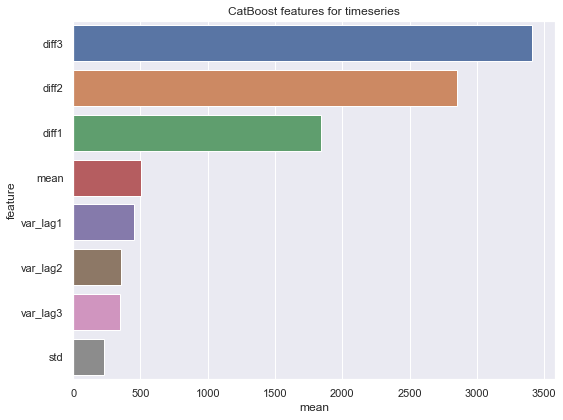

In [143]:
plt.figure(figsize=(8,6))
sns.set(context='notebook',style='darkgrid',palette='deep',font='sans-serif',font_scale=1)
sns.barplot(x='mean', y='feature', data=imp_df.sort_values(by='mean', ascending=False))
plt.title('CatBoost features for timeseries')
plt.tight_layout()
plt.show()

## Making an ensemble model for production environment

For deploying the final solution in production environment the best is to dump the model with pickle and load it into memory to handle coming requests from applicaiton side.

In [144]:
import pickle

In [182]:
dict_model = {'model_name':['xgb_1','xgb_2', 'xgb_3', 'xgb_4', 'xgb_5',
                            'lgb_1', 'lgb_2', 'lgb_3', 'lgb_4', 'lgb_5',
                            'cat_1','cat_2', 'cat_3','cat_4','cat_5'], 
              'model':[xgb_1, xgb_2, xgb_3, xgb_4, xgb_5, lgb_1, lgb_2, lgb_3, lgb_4, lgb_5,
                       cat_1, cat_2, cat_3, cat_4, cat_5]}

In [183]:
dict_model

{'model_name': ['xgb_1',
  'xgb_2',
  'xgb_3',
  'xgb_4',
  'xgb_5',
  'lgb_1',
  'lgb_2',
  'lgb_3',
  'lgb_4',
  'lgb_5',
  'cat_1',
  'cat_2',
  'cat_3',
  'cat_4',
  'cat_5'],
 'model': [XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.85, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.008, max_delta_step=0, max_depth=4,
               min_child_weight=1, missing=None, monotone_constraints='()',
               n_estimators=2000, n_jobs=8, num_parallel_tree=1,
               random_state=2021, reg_alpha=2.01, reg_lambda=0.05,
               scale_pos_weight=0.1, subsample=1, tree_method='exact',
               validate_parameters=1, verbosity=1),
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.85, gamma=0, gpu_id=-1,
               importance_type='gain', interaction

In [184]:
model_df = pd.DataFrame(dict_model)

In [185]:
model_df

,model_name,model
0,xgb_1,"XGBRegressor(base_score=0.5, booster='gbtree',..."
1,xgb_2,"XGBRegressor(base_score=0.5, booster='gbtree',..."
2,xgb_3,"XGBRegressor(base_score=0.5, booster='gbtree',..."
3,xgb_4,"XGBRegressor(base_score=0.5, booster='gbtree',..."
4,xgb_5,"XGBRegressor(base_score=0.5, booster='gbtree',..."
5,lgb_1,"LGBMRegressor(colsample_bytree=0.85, learning_..."
6,lgb_2,"LGBMRegressor(colsample_bytree=0.85, learning_..."
7,lgb_3,"LGBMRegressor(colsample_bytree=0.85, learning_..."
8,lgb_4,"LGBMRegressor(colsample_bytree=0.85, learning_..."
9,lgb_5,"LGBMRegressor(colsample_bytree=0.85, learning_..."


In [186]:
models = []
models.append(xgb_1)
models.append(xgb_2)
models.append(xgb_3)
models.append(xgb_4)
models.append(xgb_5)
models.append(lgb_1)
models.append(lgb_2)
models.append(lgb_3)
models.append(lgb_4)
models.append(lgb_5)
models.append(cat_1)
models.append(cat_2)
models.append(cat_3)
models.append(cat_4)
models.append(cat_5)

In [172]:
model_df['model']

0     XGBRegressor(base_score=0.5, booster='gbtree',...
1     XGBRegressor(base_score=0.5, booster='gbtree',...
2     XGBRegressor(base_score=0.5, booster='gbtree',...
3     XGBRegressor(base_score=0.5, booster='gbtree',...
4     XGBRegressor(base_score=0.5, booster='gbtree',...
5     LGBMRegressor(colsample_bytree=0.85, learning_...
6     LGBMRegressor(colsample_bytree=0.85, learning_...
7     LGBMRegressor(colsample_bytree=0.85, learning_...
8     LGBMRegressor(colsample_bytree=0.85, learning_...
9     LGBMRegressor(colsample_bytree=0.85, learning_...
10    <catboost.core.CatBoostRegressor object at 0x0...
11    <catboost.core.CatBoostRegressor object at 0x0...
12    <catboost.core.CatBoostRegressor object at 0x0...
13    <catboost.core.CatBoostRegressor object at 0x0...
14    <catboost.core.CatBoostRegressor object at 0x0...
Name: model, dtype: object

In [191]:
import os
from os import listdir
from os.path import isfile, join

In [188]:
for index, row in model_df.iterrows():
    model_name = row['model_name']+'.sav'
    fullpath = os.getcwd()+'\\dumped_models\\'+model_name
    print(fullpath)
    with open(fullpath, 'wb') as f:
        pickle.dump(row['model'], f)

C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\xgb_1.sav
C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\xgb_2.sav
C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\xgb_3.sav
C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\xgb_4.sav
C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\xgb_5.sav
C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\lgb_1.sav
C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\lgb_2.sav
C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\lgb_3.sav
C:\Users\E17538\OneDrive - Unipe

### Inference

Loading each trained model seperately and use their average for prediction.
Considering the nature of this problem, only we can use a hard voter which will return the mean of all models


### Implementing a hard voter manually

In [190]:
path = os.getcwd()+'\\dumped_models'

In [202]:
model_list = [f for f in listdir(path) if isfile(join(path, f))]
model_list

['cat_1.sav',
 'cat_2.sav',
 'cat_3.sav',
 'cat_4.sav',
 'cat_5.sav',
 'lgb_1.sav',
 'lgb_2.sav',
 'lgb_3.sav',
 'lgb_4.sav',
 'lgb_5.sav',
 'xgb_1.sav',
 'xgb_2.sav',
 'xgb_3.sav',
 'xgb_4.sav',
 'xgb_5.sav']

In [206]:
result_set = []
path = os.getcwd()+'\\dumped_models\\'
for model in model_list:
    model = path + model
    with open(model, 'rb') as f:
        print('Loading model {}'.format(model))
        loaded_model = pickle.load(f)
        res = loaded_model.predict(X_test)
        result_set.append(res)

Loading model C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\cat_1.sav
Loading model C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\cat_2.sav
Loading model C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\cat_3.sav
Loading model C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\cat_4.sav
Loading model C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\cat_5.sav
Loading model C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\lgb_1.sav
Loading model C:\Users\E17538\OneDrive - Uniper SE\Desktop\DailyActivities\FAD\Advpy\s8\web_traffic_prediction\dumped_models\lgb_2.sav
Loading model C:\Users\E17538\OneDrive - Uniper SE\Desk

In [208]:
len(result_set)

15

In [209]:
result_set[0]

array([ 64.0806874 ,  14.29921722,  35.47663604,  11.47295669,
        21.37935344,  14.36354951,   8.36564172,  15.38024984,
        13.88308668,  12.12145058,   6.51791631,  11.00700805,
        10.3002352 ,  41.18466716,  20.98579896,  24.33813763,
        14.26815406,  11.1532831 , 196.43760726,  14.62953299,
        43.15927667,  27.08301429,  26.67785809,  15.08208358,
        12.57462594,  48.13108311,  14.43306098,  14.41600503,
        18.74887622,  20.15718184,  13.25388125,  15.42130768,
        14.3836238 ,  19.88113469,  58.31805007,  20.48799464,
        15.71382639,  15.47744503,  19.16220311,  17.63832655,
        20.98865378,  20.82580448,  47.86917478,  62.74685503,
        14.71535317,  27.69023946,  57.2216095 ,  13.6817858 ,
        24.80311226,  12.81721932,  20.26729123,  21.62134685,
        19.00647148,  17.18806629,  19.44650563])

In [210]:
result_df = pd.DataFrame(result_set)

In [211]:
result_df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,64.080687,14.299217,35.476636,11.472957,21.379353,14.363550,8.365642,15.380250,13.883087,12.121451,...,27.690239,57.221610,13.681786,24.803112,12.817219,20.267291,21.621347,19.006471,17.188066,19.446506
1,68.910856,11.587316,36.365670,12.326454,20.653904,13.005973,9.174092,15.214184,13.700201,11.644844,...,28.116512,62.027465,14.175961,24.326487,13.928567,18.805394,20.859281,18.835015,18.031893,19.434917
2,65.690825,13.761448,33.141692,12.314099,20.751783,13.479619,8.599533,15.190928,13.925568,12.138855,...,29.040720,53.830622,15.108204,23.787661,12.318326,18.967886,20.312998,17.954334,17.205282,19.231860
3,67.190865,12.231139,40.247946,13.897155,18.045866,14.071125,8.741887,15.187509,14.471671,12.133697,...,27.785453,61.535227,14.761436,26.062446,15.757677,18.792915,21.738736,18.865590,17.366152,19.850240
4,65.375001,14.999740,38.615238,11.323116,19.816993,13.971066,8.834827,14.913473,14.100623,12.236879,...,29.690793,51.492035,14.111734,25.734271,12.960170,18.714401,21.648634,17.883121,16.892518,19.062653
5,94.731538,11.660068,41.392833,6.767495,19.398392,12.840160,9.554720,14.167372,17.296140,12.793021,...,24.958645,56.230566,14.453019,23.885843,16.314993,19.918381,21.294399,18.897610,14.176154,14.945185
6,99.164789,10.779107,50.330835,11.287829,16.872891,12.600071,9.043034,15.322860,16.569797,11.543193,...,29.197634,52.969030,13.038445,23.815773,15.335359,20.067159,21.639223,18.737654,12.061600,14.426373
7,97.109291,10.952941,39.945495,7.771923,19.526311,12.332025,8.254657,14.920491,16.277142,12.630019,...,28.738502,47.506446,13.874439,25.588532,14.756413,18.680788,21.709040,18.636243,12.438311,15.464069
8,91.018485,11.588643,57.716302,11.896267,24.415984,12.379402,8.499088,16.784680,18.314523,11.492359,...,32.367285,62.667352,14.167697,24.530544,14.588479,19.965305,21.820541,18.113172,15.925024,14.033606
9,105.262116,13.627640,61.755693,15.585384,20.615950,11.527739,7.054270,16.794179,22.209909,13.477438,...,36.223716,67.296274,13.934768,23.138792,14.454584,20.263716,21.947204,18.583885,16.806188,17.213064


In [212]:
weights = [8, 8, 8, 8, 8, 
          4, 4, 4, 4, 4,
          8, 8, 8, 8, 8]

In [218]:
weight_df = pd.DataFrame(weights, columns = ['weights'])

In [219]:
weight_df

,weights
0,8
1,8
2,8
3,8
4,8
5,4
6,4
7,4
8,4
9,4


In [223]:
pd.concat([weight_df, result_df], ignore_index=True, axis=1)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,8,64.080687,14.299217,35.476636,11.472957,21.379353,14.363550,8.365642,15.380250,13.883087,...,27.690239,57.221610,13.681786,24.803112,12.817219,20.267291,21.621347,19.006471,17.188066,19.446506
1,8,68.910856,11.587316,36.365670,12.326454,20.653904,13.005973,9.174092,15.214184,13.700201,...,28.116512,62.027465,14.175961,24.326487,13.928567,18.805394,20.859281,18.835015,18.031893,19.434917
2,8,65.690825,13.761448,33.141692,12.314099,20.751783,13.479619,8.599533,15.190928,13.925568,...,29.040720,53.830622,15.108204,23.787661,12.318326,18.967886,20.312998,17.954334,17.205282,19.231860
3,8,67.190865,12.231139,40.247946,13.897155,18.045866,14.071125,8.741887,15.187509,14.471671,...,27.785453,61.535227,14.761436,26.062446,15.757677,18.792915,21.738736,18.865590,17.366152,19.850240
4,8,65.375001,14.999740,38.615238,11.323116,19.816993,13.971066,8.834827,14.913473,14.100623,...,29.690793,51.492035,14.111734,25.734271,12.960170,18.714401,21.648634,17.883121,16.892518,19.062653
5,4,94.731538,11.660068,41.392833,6.767495,19.398392,12.840160,9.554720,14.167372,17.296140,...,24.958645,56.230566,14.453019,23.885843,16.314993,19.918381,21.294399,18.897610,14.176154,14.945185
6,4,99.164789,10.779107,50.330835,11.287829,16.872891,12.600071,9.043034,15.322860,16.569797,...,29.197634,52.969030,13.038445,23.815773,15.335359,20.067159,21.639223,18.737654,12.061600,14.426373
7,4,97.109291,10.952941,39.945495,7.771923,19.526311,12.332025,8.254657,14.920491,16.277142,...,28.738502,47.506446,13.874439,25.588532,14.756413,18.680788,21.709040,18.636243,12.438311,15.464069
8,4,91.018485,11.588643,57.716302,11.896267,24.415984,12.379402,8.499088,16.784680,18.314523,...,32.367285,62.667352,14.167697,24.530544,14.588479,19.965305,21.820541,18.113172,15.925024,14.033606
9,4,105.262116,13.627640,61.755693,15.585384,20.615950,11.527739,7.054270,16.794179,22.209909,...,36.223716,67.296274,13.934768,23.138792,14.454584,20.263716,21.947204,18.583885,16.806188,17.213064


In [233]:
result_df[0]

0      64.080687
1      68.910856
2      65.690825
3      67.190865
4      65.375001
5      94.731538
6      99.164789
7      97.109291
8      91.018485
9     105.262116
10     63.375210
11     63.128025
12     60.162643
13     61.210243
14     58.481113
Name: 0, dtype: float64

In [229]:
import numpy as np

In [234]:
round(np.average( result_df[0], weights = weight_df['weights']),2)

70.5

In [242]:
# for col in result_df:
#     print(col)

ensemble_pred = []
for column, content in result_df.iteritems():
    pred = round(np.average( result_df[column], weights = weight_df['weights']),2)
    ensemble_pred.append(pred)

In [243]:
# for index,row in result_df.iterrows():
#     round(np.average( result_df[index], weights = weight_df['weights']),2)

In [245]:
len(ensemble_pred)

55

In [246]:
ensemble_pred

[70.5,
 12.94,
 43.87,
 11.96,
 19.84,
 13.31,
 8.55,
 15.39,
 14.77,
 12.28,
 5.56,
 12.07,
 9.54,
 58.26,
 22.08,
 25.48,
 14.06,
 11.22,
 206.94,
 13.83,
 50.34,
 27.6,
 27.82,
 15.12,
 13.63,
 42.42,
 14.24,
 14.0,
 17.91,
 19.11,
 12.95,
 14.94,
 14.0,
 21.07,
 65.23,
 21.02,
 15.64,
 16.34,
 18.48,
 17.5,
 20.88,
 19.19,
 58.07,
 69.69,
 15.74,
 28.73,
 57.27,
 14.23,
 24.1,
 14.16,
 19.68,
 21.27,
 18.56,
 16.54,
 18.48]

### caluclating score

I use MSE to calculate model accuracy as follows:

In [248]:
# MSE

y_test[:5]

492    67
493    13
494    41
495    10
496    21
Name: current_val, dtype: int64

In [252]:
n = len(y_test)
n

55

In [254]:
n = len(y_test)
mse = np.sum((y_test - ensemble_pred)**2)/n
mse

11.434661818181818

## Using SVM on the same dataframe

+ kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
+ Cfloat, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

+ epsilonfloat, default=0.1
Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

In [255]:
from sklearn.svm import SVR

In [260]:
model_svr = SVR(kernel = 'rbf', C=1.0, epsilon=0.2)
model_svr.fit(X_train, y_train)

SVR(epsilon=0.2)

In [261]:
model_svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [262]:
model_svr.score(X_test, y_test)

0.24546961218367325

In [263]:
model_svr.score(X_train, y_train)

0.19633184415416582

In [264]:
model_svr = SVR(kernel = 'linear', C=1.0, epsilon=0.2)
model_svr.fit(X_train, y_train)

SVR(epsilon=0.2, kernel='linear')

In [265]:
model_svr.score(X_test, y_test)

0.9999967952828507

In [266]:
model_svr.score(X_train, y_train)

0.9999963902651855

#### SVM worked really well with linear kernel. Both train and test scores are above 99%.

## Implementing stacking 

In [283]:
model_df

,model_name,model
0,xgb_1,"XGBRegressor(base_score=0.5, booster='gbtree',..."
1,xgb_2,"XGBRegressor(base_score=0.5, booster='gbtree',..."
2,xgb_3,"XGBRegressor(base_score=0.5, booster='gbtree',..."
3,xgb_4,"XGBRegressor(base_score=0.5, booster='gbtree',..."
4,xgb_5,"XGBRegressor(base_score=0.5, booster='gbtree',..."
5,lgb_1,"LGBMRegressor(colsample_bytree=0.85, learning_..."
6,lgb_2,"LGBMRegressor(colsample_bytree=0.85, learning_..."
7,lgb_3,"LGBMRegressor(colsample_bytree=0.85, learning_..."
8,lgb_4,"LGBMRegressor(colsample_bytree=0.85, learning_..."
9,lgb_5,"LGBMRegressor(colsample_bytree=0.85, learning_..."


In [290]:
model_cat = model_df.iloc[10]['model']
model_lgb = model_df.iloc[5]['model']
model_xgb = model_df.iloc[0]['model']

In [269]:
df_base_features

,var_lag3,var_lag2,var_lag1,current_val,date_idx,mean,std,diff1,diff2,diff3
0,18,11,5,13,2015-07-04,11.33,6.51,8,2,-5
1,11,5,13,14,2015-07-05,9.67,4.16,1,9,3
2,5,13,14,9,2015-07-06,10.67,4.93,-5,-4,4
3,13,14,9,9,2015-07-07,12.00,2.65,0,-5,-4
4,14,9,9,22,2015-07-08,10.67,2.89,13,13,8
...,...,...,...,...,...,...,...,...,...,...
542,15,26,14,20,2016-12-27,18.33,6.66,6,-6,5
543,26,14,20,22,2016-12-28,20.00,6.00,2,8,-4
544,14,20,22,19,2016-12-29,18.67,4.16,-3,-1,5
545,20,22,19,18,2016-12-30,20.33,1.53,-1,-4,-2


In [272]:
len(df_base_features) - round(len(df_base_features)*.1)

492

In [298]:
X_test = df_base_features[len(df_base_features) - round(len(df_base_features)*.1):] 
X_test = X_test.drop(['current_val', 'date_idx'], axis = 1)
y_test = df_base_features[len(df_base_features) - round(len(df_base_features)*.1):]['current_val'] 
X_test.head()

,var_lag3,var_lag2,var_lag1,mean,std,diff1,diff2,diff3
492,14,20,8,14.00,6.00,59,47,53
493,20,8,67,31.67,31.18,-54,5,-7
494,8,67,13,29.33,32.72,28,-26,33
495,67,13,41,40.33,27.01,-31,-3,-57
496,13,41,10,21.33,17.10,11,-20,8


In [299]:
y_test.head()

492    67
493    13
494    41
495    10
496    21
Name: current_val, dtype: int64

### First I need to train the second level algorithm (second layer model). I choose SVM to be the second level algo.

In [308]:
X_train_l2 = df_base_features[:(len(df_base_features) - round(len(df_base_features)*.1))] 
X_train_l2 = X_train_l2.drop(['current_val', 'date_idx'], axis = 1)
y_train_l2 = df_base_features[:(len(df_base_features) - round(len(df_base_features)*.1))]['current_val'] 
X_train_l2.head()

,var_lag3,var_lag2,var_lag1,mean,std,diff1,diff2,diff3
0,18,11,5,11.33,6.51,8,2,-5
1,11,5,13,9.67,4.16,1,9,3
2,5,13,14,10.67,4.93,-5,-4,4
3,13,14,9,12.00,2.65,0,-5,-4
4,14,9,9,10.67,2.89,13,13,8


In [310]:
X_train_l2.tail()

,var_lag3,var_lag2,var_lag1,mean,std,diff1,diff2,diff3
487,50,16,30,32.00,17.09,-12,2,-32
488,16,30,18,21.33,7.57,7,-5,9
489,30,18,25,24.33,6.03,-11,-4,-16
490,18,25,14,19.00,5.57,6,-5,2
491,25,14,20,19.67,5.51,-12,-6,-17


In [309]:
y_train_l2.head()

0    13
1    14
2     9
3     9
4    22
Name: current_val, dtype: int64

In [311]:
y_train_l2.tail()

487    18
488    25
489    14
490    20
491     8
Name: current_val, dtype: int64

### Gathering outputs of level 1 trained models.

In [313]:
# model_cat.predict(X_train_l2)

In [314]:
model_res_df = pd.DataFrame()

In [315]:
model_res_df['cat'] = model_cat.predict(X_train_l2)

In [316]:
model_res_df.head()

,cat
0,12.996341
1,14.005002
2,8.989233
3,8.991092
4,21.989308


In [317]:
model_res_df['lgb'] = model_lgb.predict(X_train_l2)

In [318]:
model_res_df['xgb'] = model_cat.predict(X_train_l2)

In [319]:
model_res_df.head()

,cat,lgb,xgb
0,12.996341,10.498439,12.996341
1,14.005002,13.850525,14.005002
2,8.989233,10.774642,8.989233
3,8.991092,23.365815,8.991092
4,21.989308,27.346013,21.989308


In [320]:
model_res_df['current_val']=df_base_features[:len(model_res_df)]['current_val']

In [321]:
model_res_df.tail()

,cat,lgb,xgb,current_val
487,18.026419,18.020510,18.026419,18
488,25.013164,26.632091,25.013164,25
489,13.985204,13.131545,13.985204,14
490,19.993826,19.350803,19.993826,20
491,8.017848,8.824027,8.017848,8


### above dataframe is composed of the outputs of each model in layer 1 (predicted values), and the target value (y_true).

Now we can train an SVM in the second layer to make a stacking model.

In [322]:
from sklearn.model_selection import train_test_split 

In [323]:
df_features = model_res_df[['cat', 'lgb', 'xgb']]
df_target = model_res_df[['current_val']]

In [325]:
X_train_stack, X_test_stack, y_train_stack, y_test_stack = train_test_split(df_features, df_target, 
                                                                            test_size=0.1, random_state=42)
# X_test_stack, X_val_stack, y_test_stack, y_val_stack = train_test_split(X_test_stack, y_test_stack,
#                                                                         test_size=0.5, random_state=42)


In [326]:
model_svr_l2 = SVR(kernel = 'rbf', C=1.0, epsilon=0.2)

In [327]:
model_svr_l2.fit(X_train_stack, y_train_stack)

C:\Users\E17538\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(epsilon=0.2)

In [329]:
model_svr_l2.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [331]:
model_svr_l2.score(X_test_stack, y_test_stack)

0.993572751552569

In [332]:
model_svr_l2.score(X_train_stack, y_train_stack)

0.2613805326256671

In [336]:
def stack_ts_pred(df_stack_test):
    model_cat = model_df.iloc[10]['model']
    model_lgb = model_df.iloc[5]['model']
    model_xgb = model_df.iloc[0]['model']
    
    model_res_df = pd.DataFrame()
    model_res_df['cat'] = model_cat.predict(df_stack_test)
    model_res_df['lgb'] = model_lgb.predict(df_stack_test)
    model_res_df['xgb'] = model_cat.predict(df_stack_test)
    
    return model_svr_l2.predict(model_res_df)
    

In [338]:
df_stack_test= df_base_features.drop(['current_val', 'date_idx'], axis=1)[470:]

In [341]:
stack_ts_pred(df_stack_test)

array([15.71867027, 13.74620732, 10.20579653, 23.73480526, 10.18709389,
       19.77037167, 10.3080267 , 26.1194824 , 25.14467695, 15.73984946,
       18.80569192, 19.74906883, 11.85293625, 18.98227012, 49.07265238,
       15.67049678, 30.304656  , 17.84159679, 25.50566258, 13.65672416,
       19.83358242,  8.79506997, 49.80797717, 13.78741453, 36.52461831,
       11.18796478, 21.12887257, 13.95095536,  9.06589092, 14.9778794 ,
       14.12386113, 12.08745159,  7.79673131, 11.44261335, 10.31765002,
       44.79891482, 21.01276175, 25.92837896, 13.92044992, 11.23968858,
       35.93825914, 14.21628506, 42.68431365, 28.23110971, 29.09090456,
       14.70257974, 12.44945478, 37.39679251, 13.99805433, 14.02334119,
       18.56262315, 20.05383412, 13.02541294, 15.01004945, 14.09883859,
       20.4576783 , 48.88337025, 20.31006703, 16.4126159 , 15.37327721,
       18.85022976, 17.48622685, 20.7033749 , 20.18327833, 47.92596499,
       47.71157764, 15.60641867, 27.65089694, 50.48213584, 13.55

In [342]:
from sklearn.metrics import mean_squared_error

In [343]:
mean_squared_error(df_base_features['current_val'][470:],stack_ts_pred(df_stack_test))

381.0103176464252

In [344]:
np.sqrt( mean_squared_error(df_base_features['current_val'][470:],stack_ts_pred(df_stack_test)) )

19.519485588673316

## Question: How should the final model be for production environment? Traders ad wouldn't like to send multiple variable to make prediction for the next few days. Instead they want to know how much a stock will cost on April 23rd. How the above models should change to satisfy front office?